In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
data = pd.read_csv('Women.csv')
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
for i in data.iloc[: , 5 : ].columns:
    print(f'{i} : {data[i].nunique()}')

Rating : 5
Recommended IND : 2
Positive Feedback Count : 82
Division Name : 3
Department Name : 6
Class Name : 20


# Undestanding Data

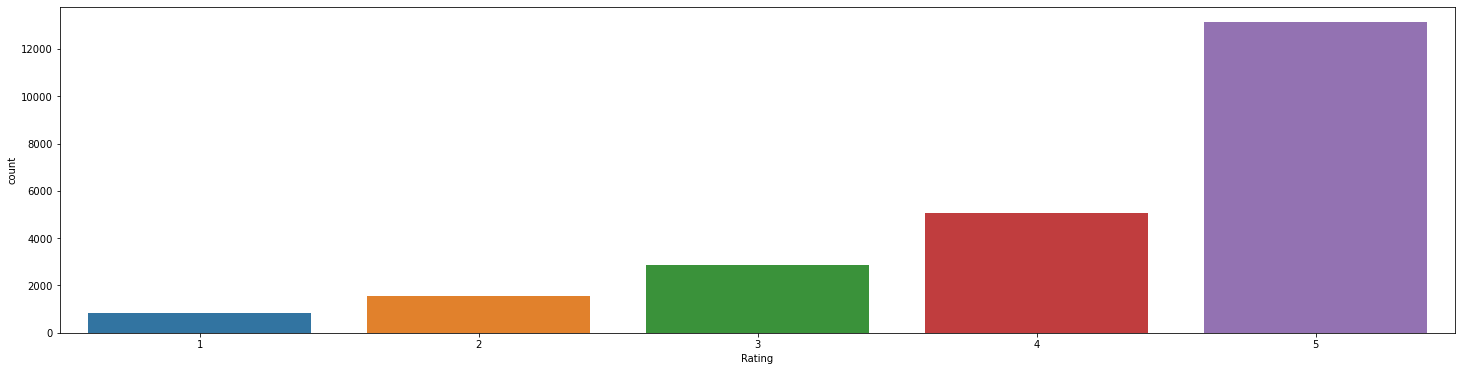

In [4]:
plt.figure(figsize = (25,6))
sns.countplot(data['Rating']);

-  Most of the rating are 3-5 which describe product quality are good
-  Most of the items are liked by buyers

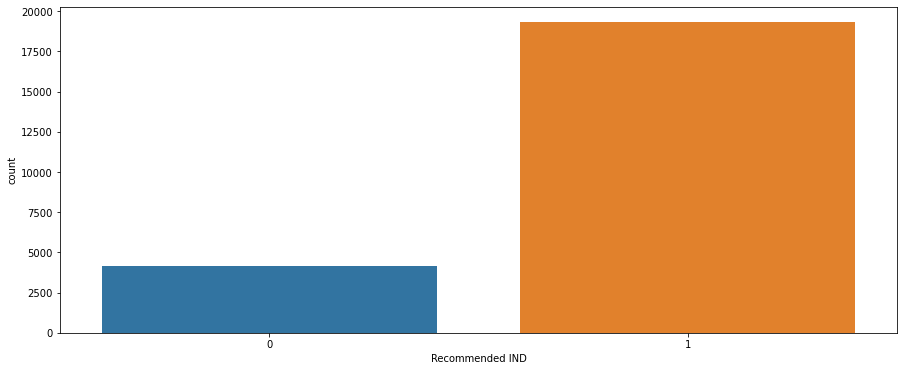

In [5]:
plt.figure(figsize = (15,6))
sns.countplot(data['Recommended IND']);

- Most of the women recommended the products
- Good numbers of buyers liked the product 
- There can be discount if you recommend a product/

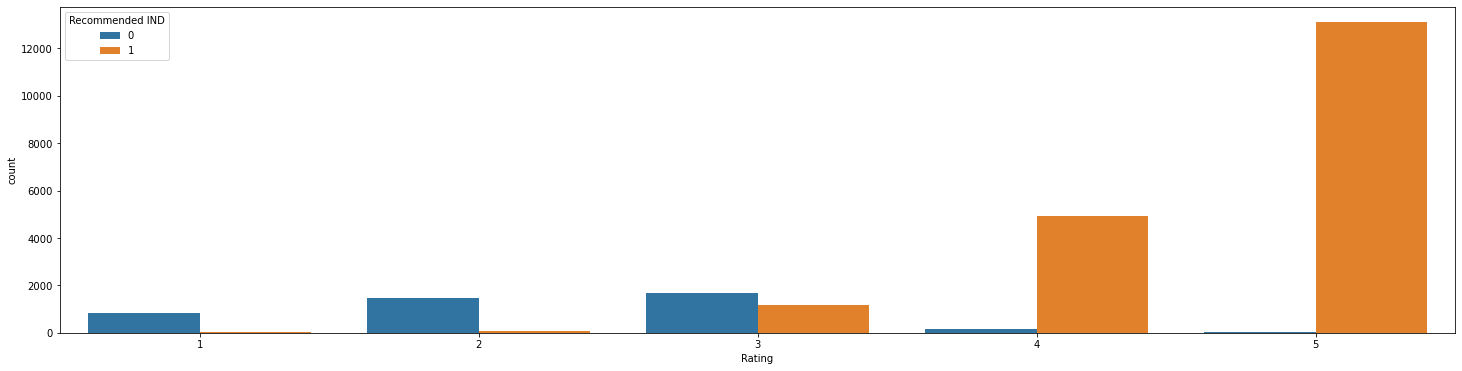

In [6]:
plt.figure(figsize = (25,6))
sns.countplot(data['Rating'], hue = data['Recommended IND']);

- Most of the good rated products are recommended 


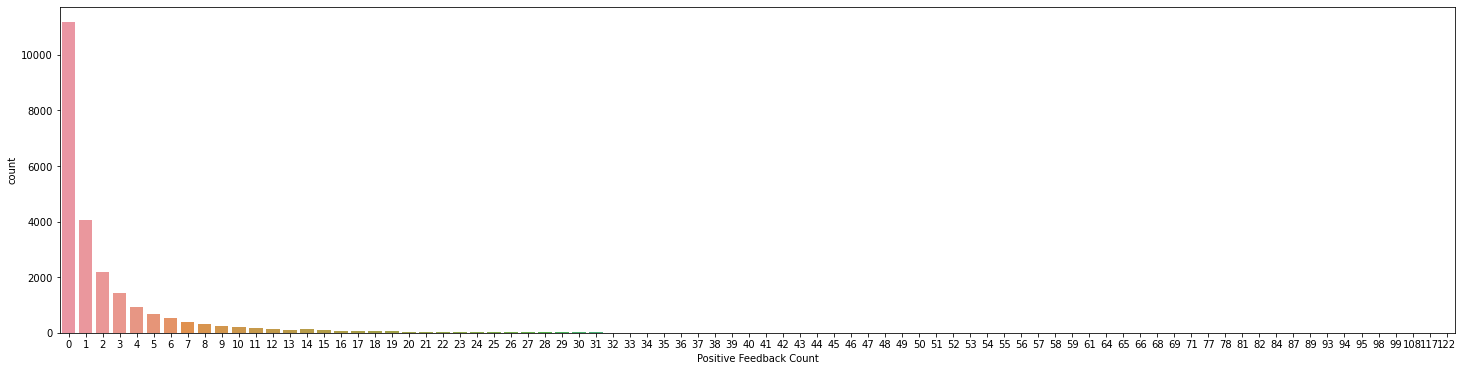

In [7]:
plt.figure(figsize = (25,6))
sns.countplot(data['Positive Feedback Count']);

In [8]:
drop_positive = data[data['Positive Feedback Count'] > 20].index

In [9]:
data = data.drop(drop_positive, axis = 0).reset_index(drop = True)

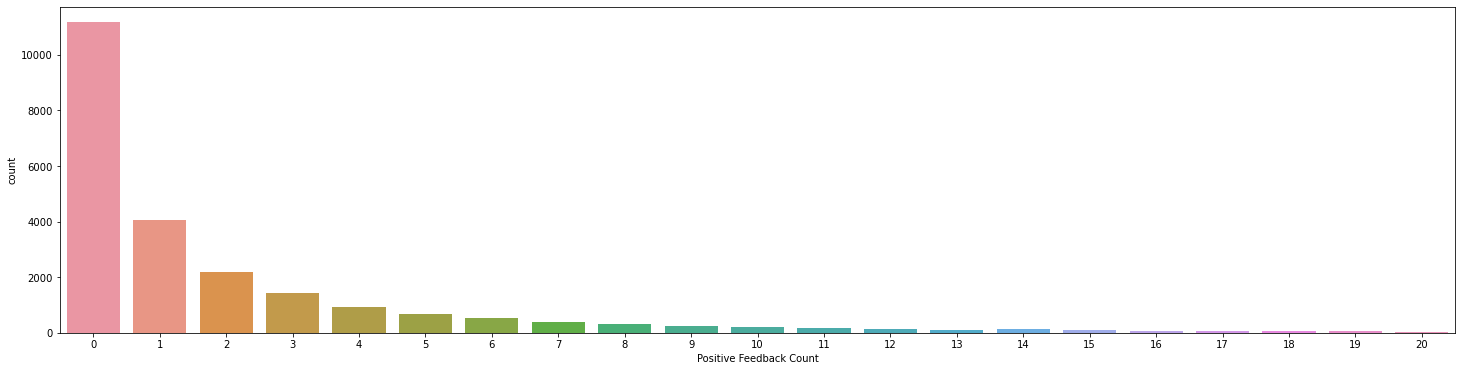

In [10]:
plt.figure(figsize = (25,6))
sns.countplot(data['Positive Feedback Count']);

In [11]:
data.shape

(23096, 11)

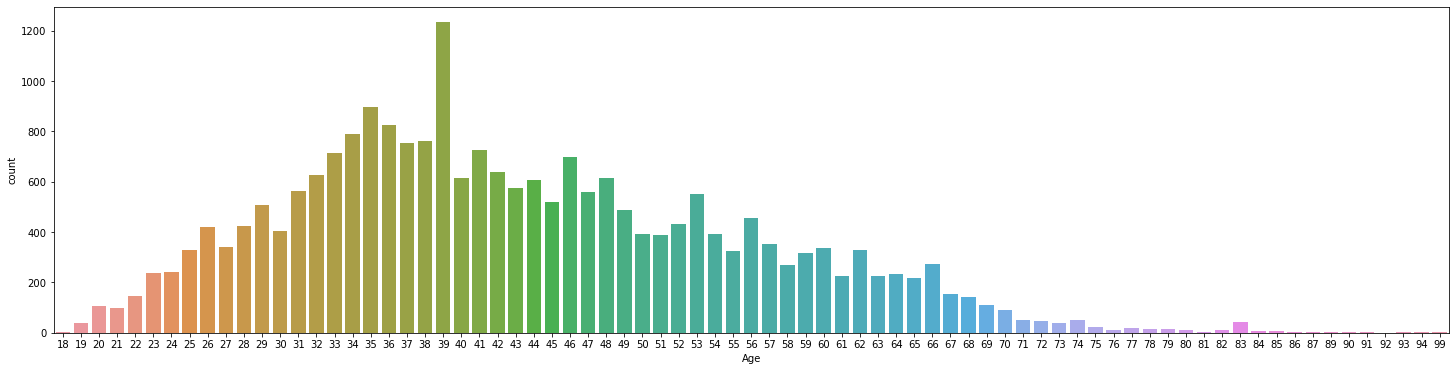

In [12]:
plt.figure(figsize = (25,6))
sns.countplot(data['Age']);

- Age 30 to 50 are big buyers

- Because people of this age tends to have more money than teens or senior citizens.

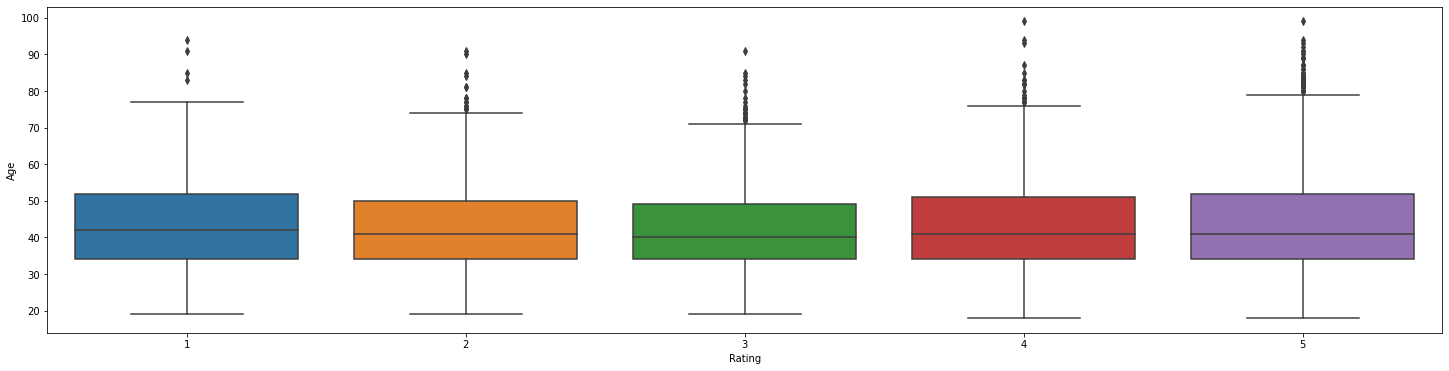

In [13]:
plt.figure(figsize = (25,6))
sns.boxplot(y = data['Age'], x = data['Rating']);

- Most of the product have got good and Average ratings 

- Lowest for 84 , 90, 91 & 94

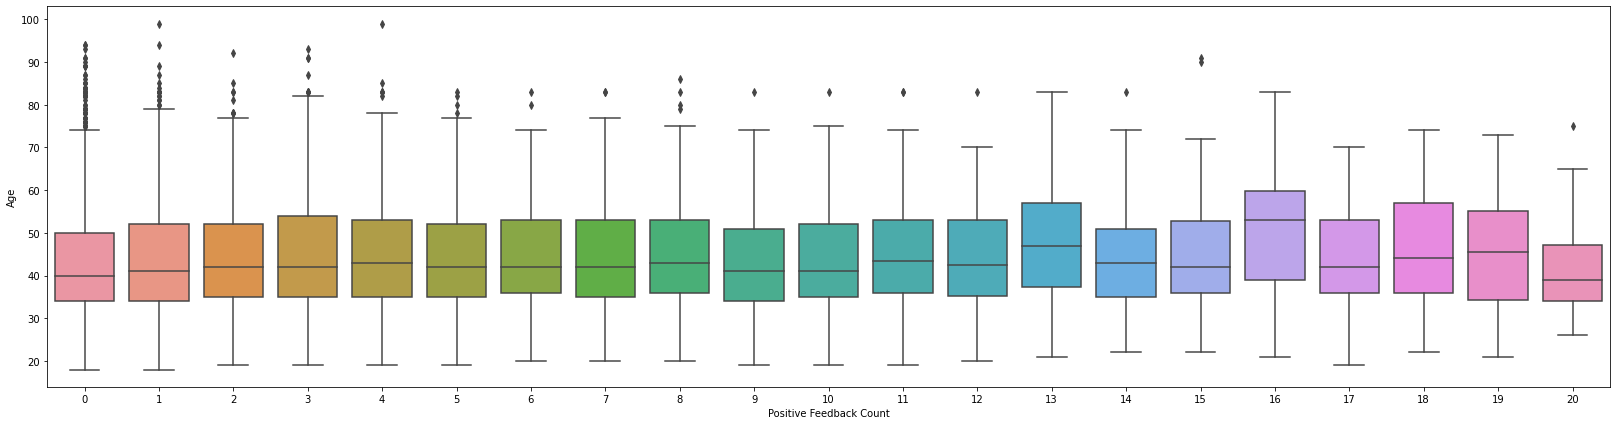

In [14]:
plt.figure(figsize = (28,7))
sns.boxplot(y = data['Age'], x = data['Positive Feedback Count']);

- Highest for 90 but lowest for 84 and 94

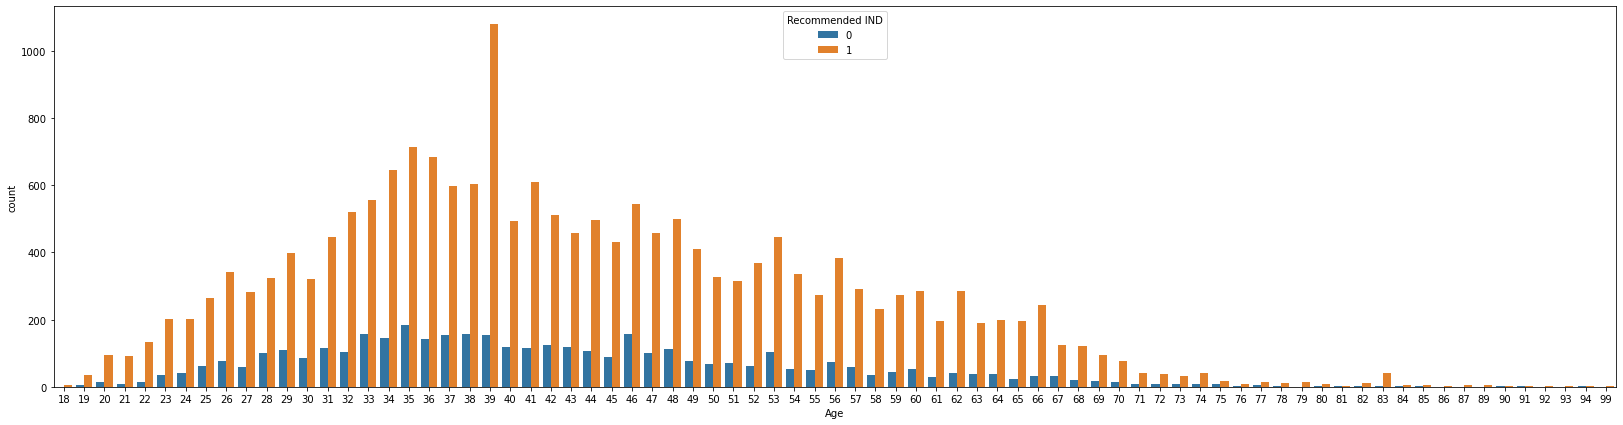

In [15]:
plt.figure(figsize = (28,7))
sns.countplot(data['Age'], hue = data['Recommended IND']);

- More numbers of count of recommendation over all age bands
- We can see here buying is directly proprtional to Recommendations

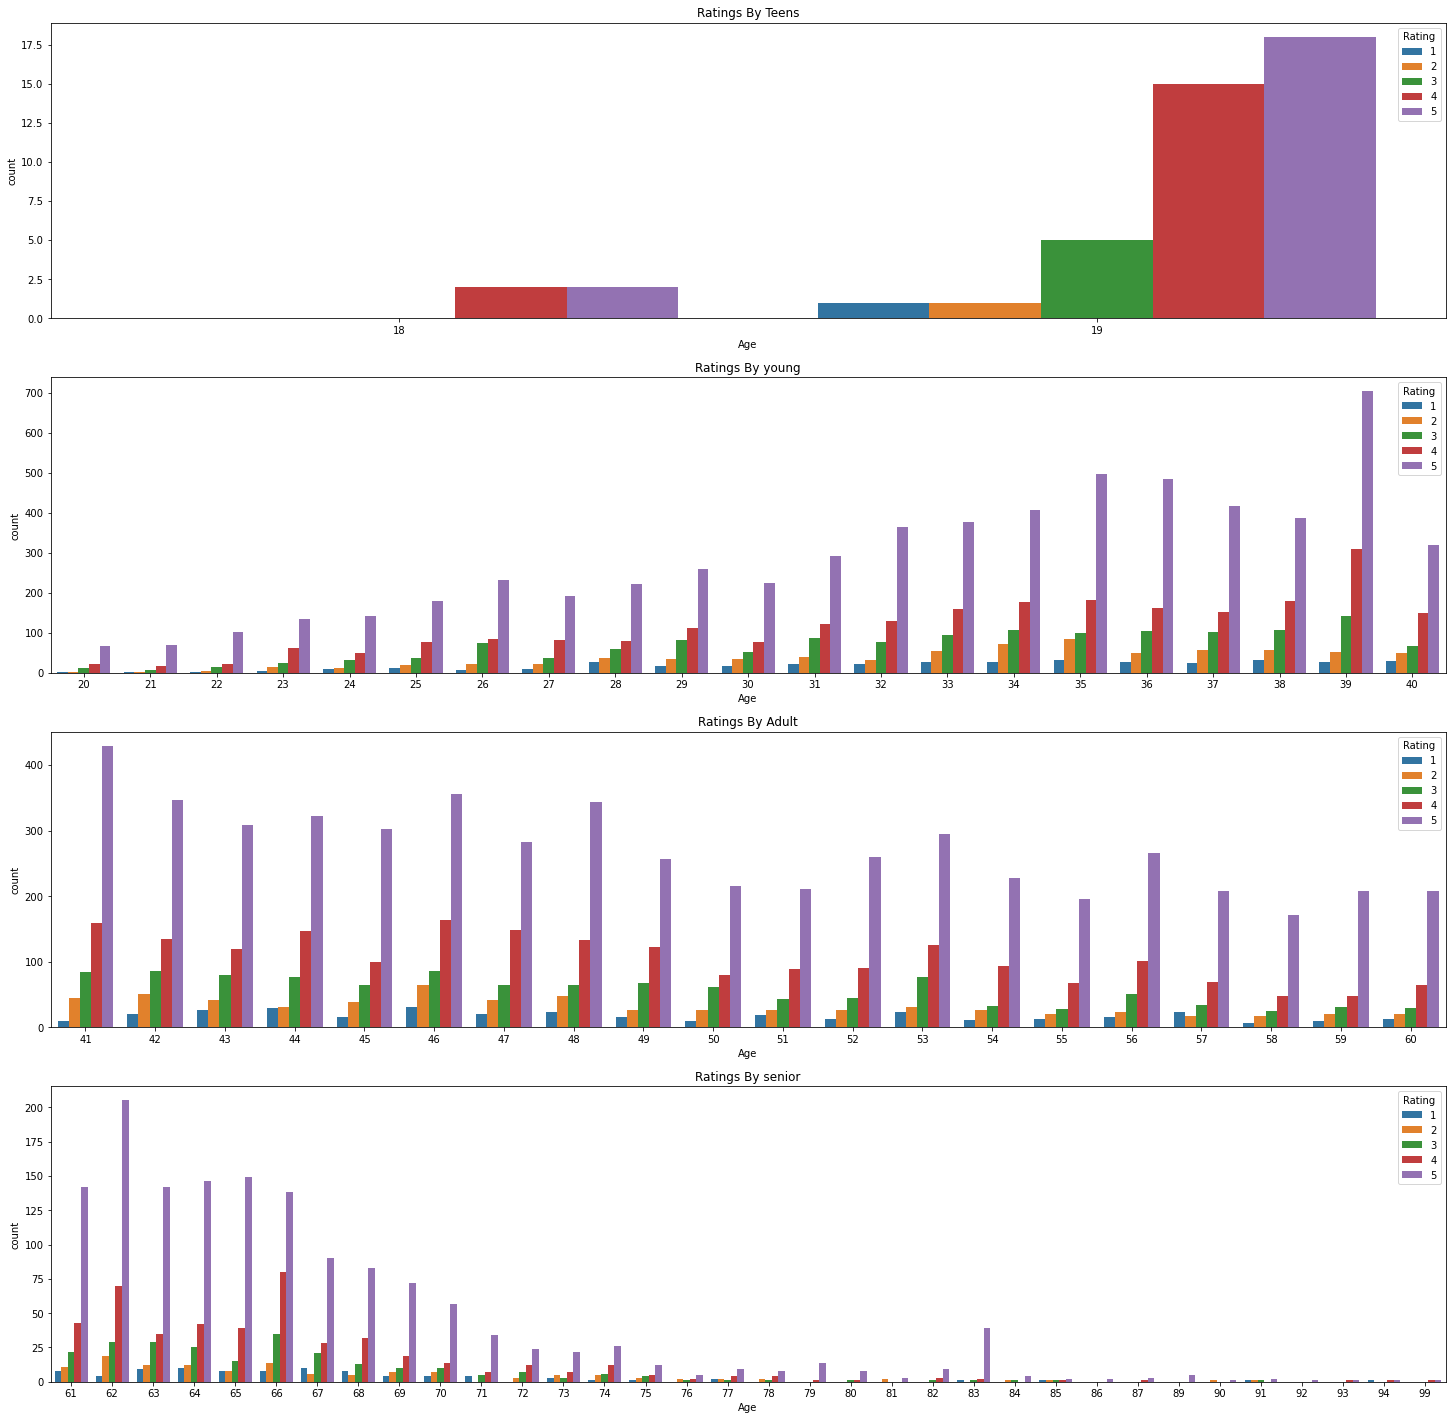

In [16]:
teens = data[data['Age'] <= 19]
youngs= data[(data['Age'] > 19) & (data['Age'] <= 40)]
adult = data[(data['Age'] > 40) & (data['Age'] <= 60)]
senior = data[data['Age'] > 60]
plt.figure(figsize = (25,25))
plt.subplot(4,1,1)
sns.countplot(teens['Age'], hue = data['Rating'])
plt.title('Ratings By Teens')
plt.subplot(4,1,2)
sns.countplot(youngs['Age'], hue = data['Rating'])
plt.title('Ratings By young')
plt.subplot(4,1,3)
sns.countplot(adult['Age'], hue = data['Rating'])
plt.title('Ratings By Adult')
plt.subplot(4,1,4)
sns.countplot(senior['Age'], hue = data['Rating'])
plt.title('Ratings By senior')
plt.legend(loc = 'upper right',title = 'Rating')
plt.show()

- Youngf Women are buying more and Adult women giving good rating rather than youngsters.

In [ ]:
data.head()

In [17]:
data['Class Name'].value_counts()

Dresses           6149
Knits             4764
Blouses           3045
Sweaters          1412
Pants             1375
Jeans             1138
Fine gauge        1087
Skirts             940
Jackets            693
Lounge             683
Swim               348
Outerwear          323
Shorts             316
Sleep              227
Legwear            165
Intimates          154
Layering           144
Trend              116
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

# Word Cloud

#### Checking Null Values

In [18]:
data.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3761
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

#### Dropping All Null Values

In [19]:
data = data.dropna().reset_index(drop = True)

## Word Cloud For Review Text

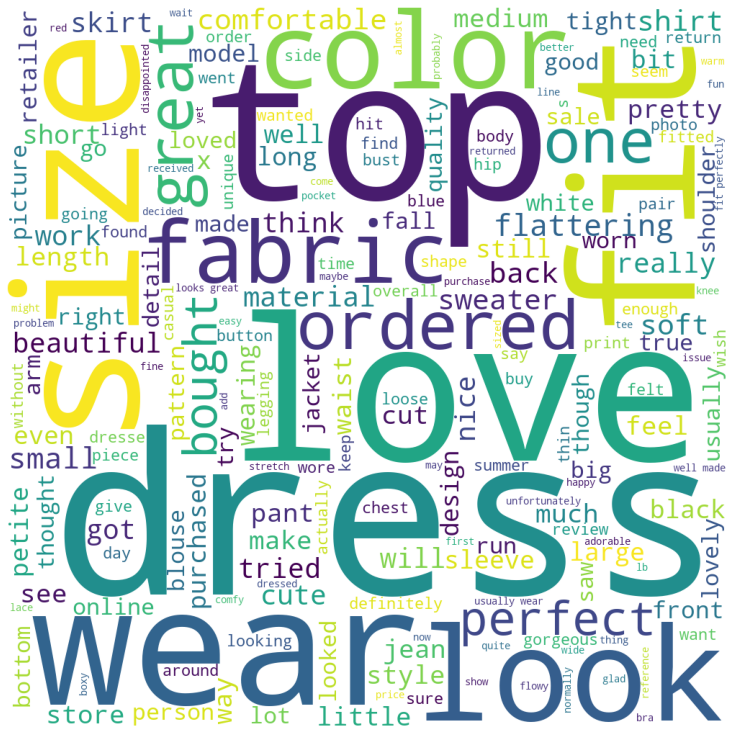

In [21]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through Column
for val in data['Review Text']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Word Cloud For Title

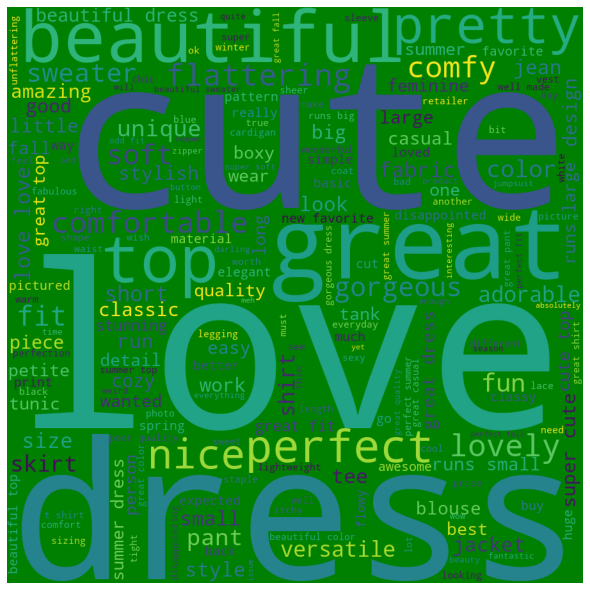

In [22]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through Column
for val in data['Title']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 900, height = 900,
                background_color ='green',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

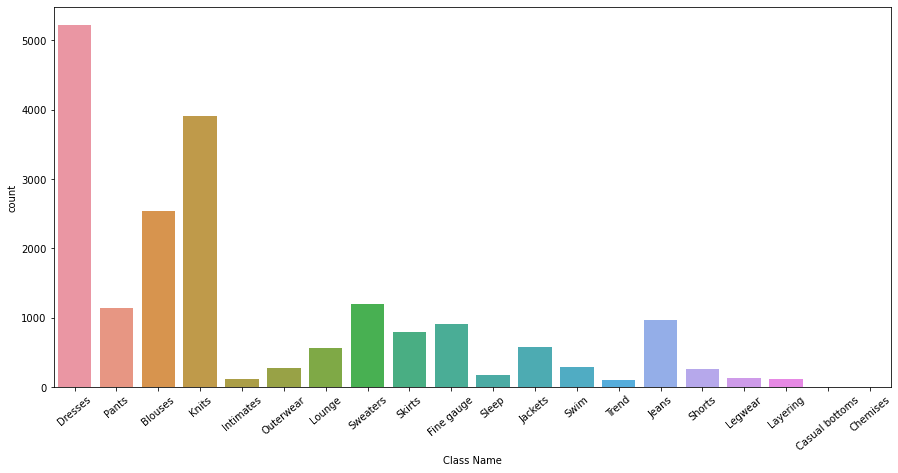

In [23]:
plt.figure(figsize = (15, 7))
sns.countplot(data['Class Name'])
plt.xticks(rotation = 40)
plt.show()

- **Dresses , Knits , Blouses are the most sold items**

## Histograms

In [ ]:
num_cols = data.select_dtypes(exclude = 'object')
num_cols = num_cols.drop(['Unnamed: 0','Clothing ID'], axis = 1)
num_cols.hist(figsize = (10,10), color = 'green');

## Boxplots

In [ ]:
num_cols.boxplot(figsize = (10,10), color = 'orange');

## Distribution Plots

In [ ]:
plt.figure(figsize = (10,10))
for i in enumerate(num_cols.columns):
    plt.subplot(2,2, i[0] +1)
    sns.distplot(num_cols[i[1]],kde = True, color = 'yellow')
plt.show

## Individual Boxplots

In [ ]:
plt.figure(figsize = (10,10))
for i in enumerate(num_cols.columns):
    plt.subplot(2,2, i[0] +1)
    sns.boxplot(num_cols[i[1]], color = 'red')
plt.show

## Correlation Heatmap

In [ ]:
plt.figure(figsize=(20, 5))
sns.heatmap(num_cols.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

-  **Recommendation and ratings are showing good correlation, i.e, Directly Proportional to each other.**

# Clustering

In [ ]:
data.head(1)

## I am creating a new data frame with all relevant coulums

In [ ]:
new_df = data[['Age', 'Rating','Recommended IND', 'Positive Feedback Count', 'Division Name','Department Name','Class Name']]

In [ ]:
new_df.head()

## Convert Categorical data to Numerical suong Labal Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Label Encoding Categorical Columns

In [ ]:
le = LabelEncoder()
for col in new_df.iloc[:,4 : ].columns:
    new_df[col] = le.fit_transform(new_df[col])

In [ ]:
new_df.head()

## Scaling Data

In [ ]:
scaler = StandardScaler()
scaler.fit(new_df)
scaled_df = pd.DataFrame(scaler.transform(new_df), columns = new_df.columns, index = new_df.index)
scaled_df.head()

## K-Means Algorithm

### Silhouette Coefficient

- One of the metrics to evaluate the quality of clustering is referred to as silhouette analysis. Silhouette analysis can be applied to other clustering algorithms as well. Silhouette coefficient ranges between −1 and 1, where a higher silhouette coefficient refers to a model with more coherent clusters.



- The Silhouette Coefficient is calculated using the mean intra-cluster distance ( a) and the mean nearest-cluster distance ( b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max (a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.


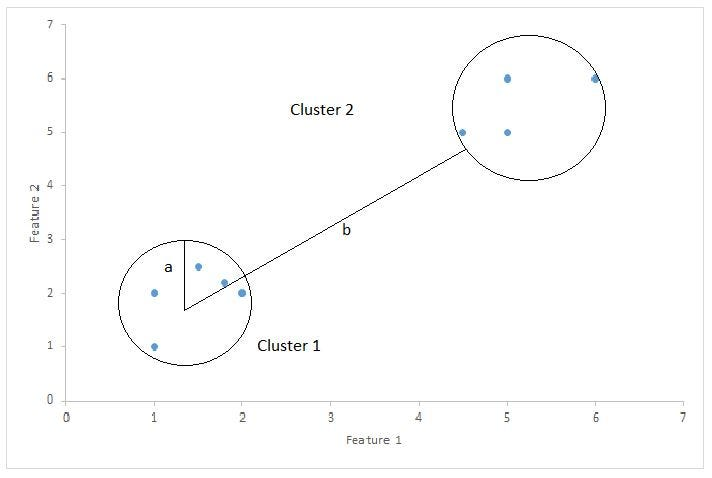